In [55]:
from numpy_sugar.linalg import economic_qs, economic_qs_linear
from numpy.random import RandomState, default_rng
from numpy import arange, concatenate, newaxis, median, asarray
from glimix_core.lmm import LMM
from scipy.stats import chi2
from numpy_sugar import epsilon
from numpy import asarray, clip, inf, ones, sqrt
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from struct_lmm2 import StructLMM2, create_variances, sample_phenotype_gxe

In [56]:
import struct_lmm2 # check that it refers to code in repo
struct_lmm2

<module 'struct_lmm2' from '/hps/nobackup/stegle/users/acuomo/git_repos/struct-lmm2/struct_lmm2/__init__.py'>

In [57]:
random = default_rng(20)

n_individuals = 100

maf_min = 0.40
maf_max = 0.45

n_snps = 100
# n_snps = 500

# n_cells = 100
# n_cells = 10
# n_cells = 2
n_cells = arange(n_individuals) + 1

n_env_groups = 10
offset = 0.3

# indices of causal SNPs
g_causals = [5, 6]
gxe_causals = [10, 11]

# weight of genetic variance explained by GxE
r0 = 0.5
# r0 = 0
# r0 = 1

# total variance explained by genetics (G + GxE)
v0 = 0.5
# v0 = 0


v = create_variances(r0, v0)

In [58]:
s = sample_phenotype_gxe(
        offset=offset,
        n_individuals=n_individuals,
        n_snps=n_snps,
        n_cells=n_cells,
        n_env_groups=n_env_groups,
        
        maf_min=maf_min,
        maf_max=maf_max,
        g_causals=g_causals,
        gxe_causals=gxe_causals,
        variances=v,
        random=random,
    )

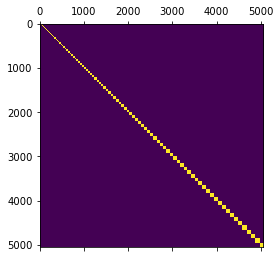

In [59]:
# kinship matrix (block diagonal)
# plot for few individuals to check if it looks good
plt.matshow(s.K)

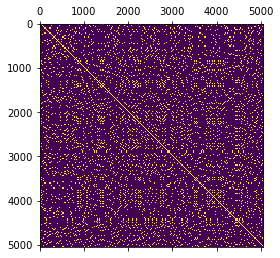

In [60]:
plt.matshow(s.E @ s.E.T)

In [61]:
# set up model
# covariates (just ones here)
M = ones((s.y.shape[0], 1))

In [62]:
y = s.y.reshape(s.y.shape[0],1)

In [63]:
slmm2 = StructLMM2(y, M, s.E, s.Ls)

In [64]:
ge = slmm2.predict_interaction(s.G, s.mafs)

In [65]:
# 55 cells, 20 SNPs
s.G.shape

(5050, 100)

In [66]:
# beta_G value for each of the 20 SNPs
beta_G = ge[0]
beta_G.shape

(100,)

In [67]:
# beta_GxE values (should be n_SNPs x n_cells, or viceversa)
beta_GxE = ge[1][0]
beta_GxE.shape

(5050, 100)

In [68]:
beta_GxE

array([[ 0.09257104, -0.12373349, -0.0496724 , ..., -0.04476895,
         0.03166321,  0.0718143 ],
       [-0.02529162, -0.10432847,  0.03691712, ..., -0.00809339,
        -0.05449913,  0.03327968],
       [ 0.03129376, -0.14241515, -0.21504924, ..., -0.06818468,
        -0.01359353, -0.10946773],
       ...,
       [ 0.09063669,  0.00780565, -0.05705466, ...,  0.19234486,
        -0.00548358,  0.07665371],
       [ 0.09257104, -0.12373349, -0.0496724 , ..., -0.04476895,
         0.03166321,  0.0718143 ],
       [-0.03228928,  0.10769843,  0.05364501, ...,  0.03250748,
         0.10853758,  0.09584658]])

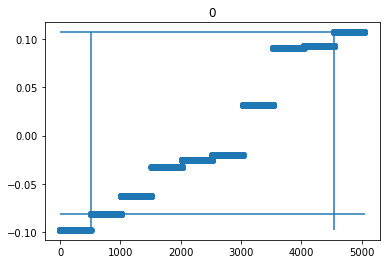

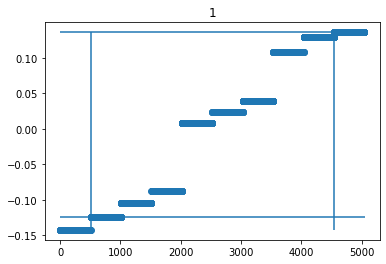

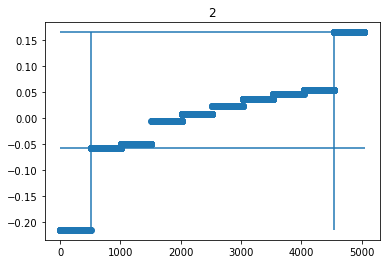

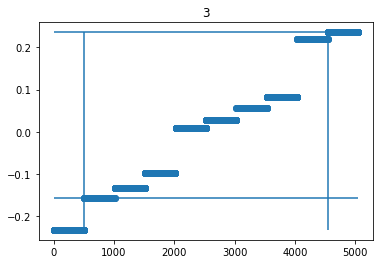

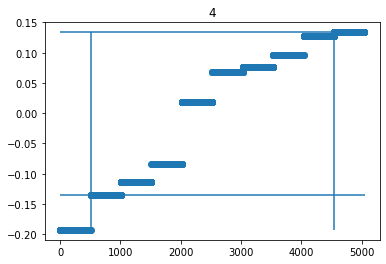

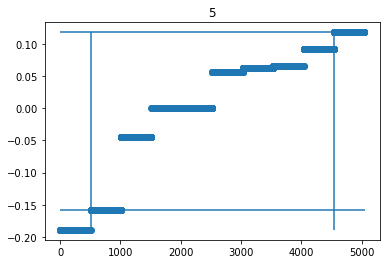

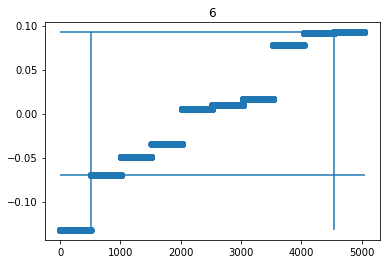

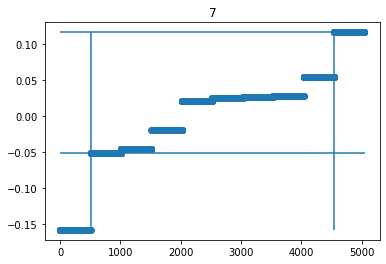

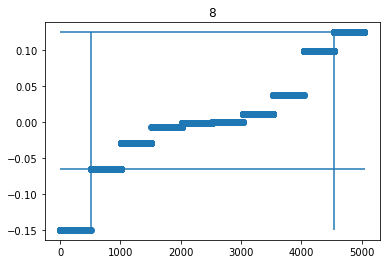

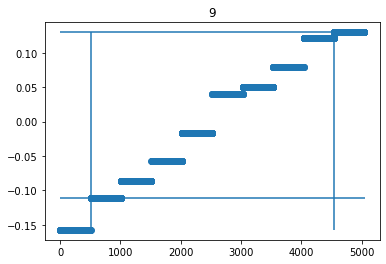

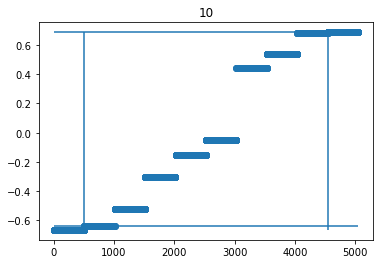

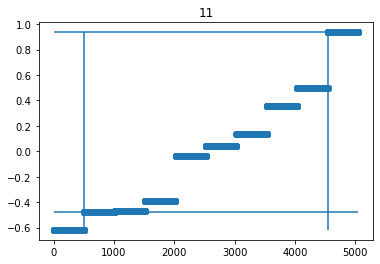

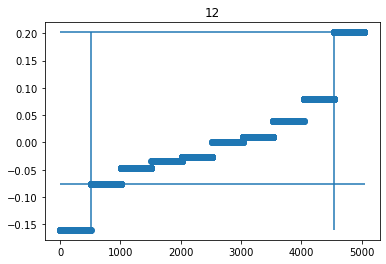

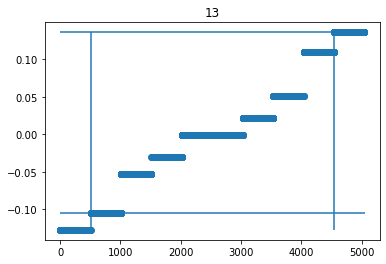

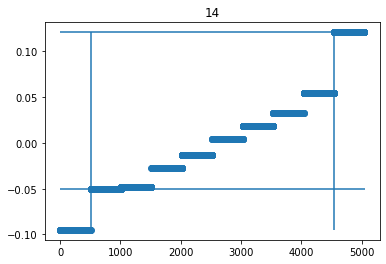

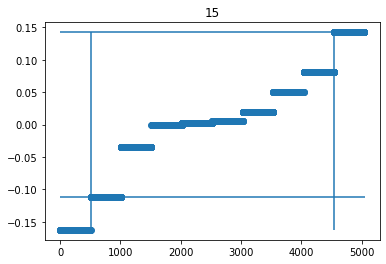

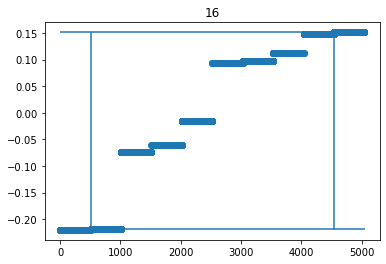

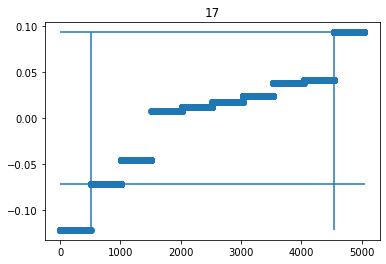

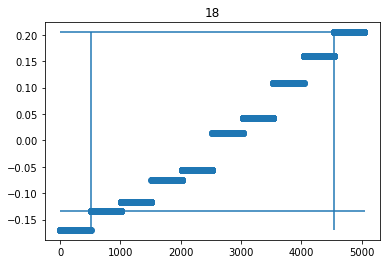

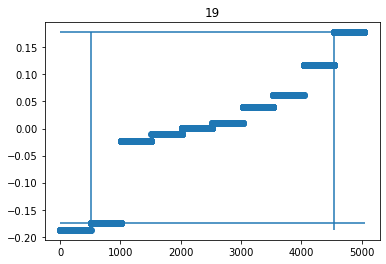

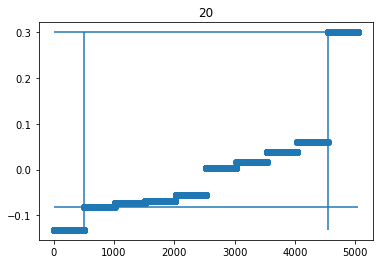

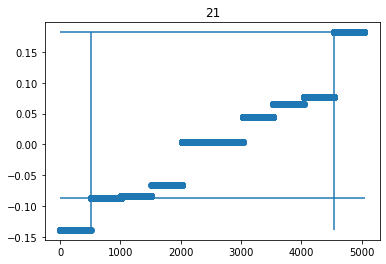

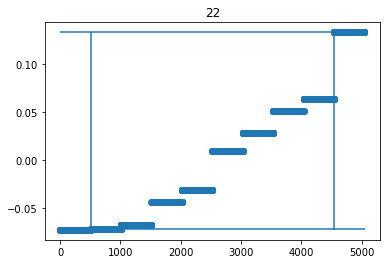

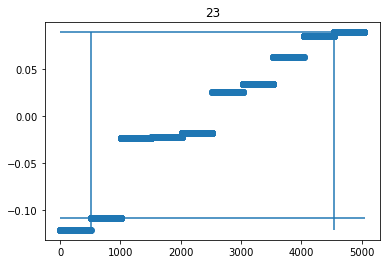

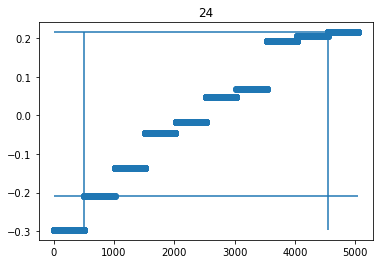

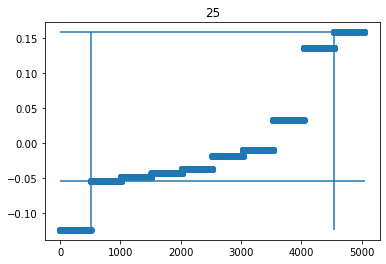

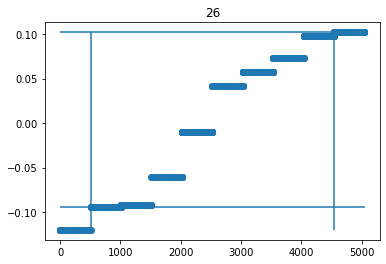

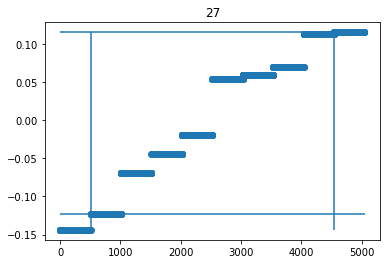

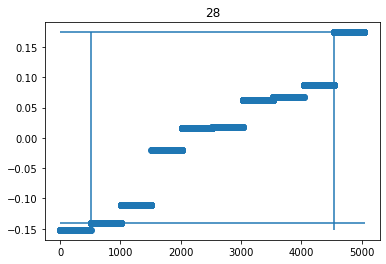

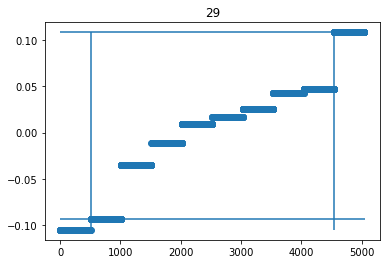

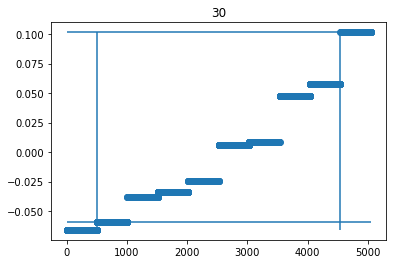

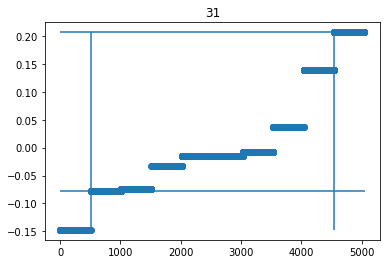

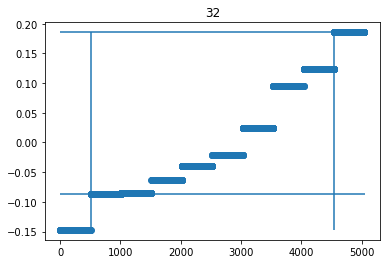

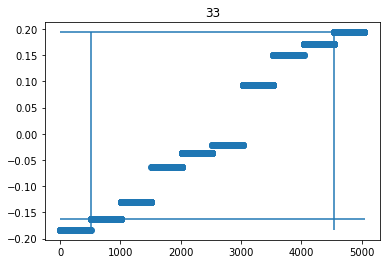

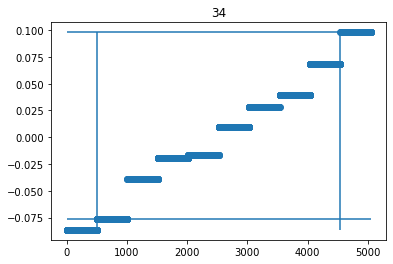

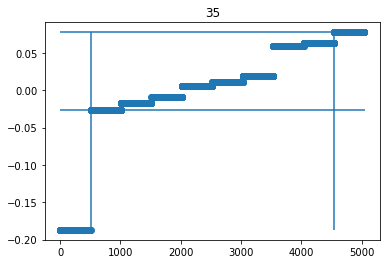

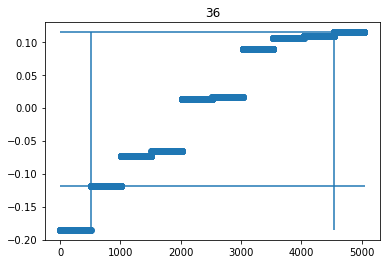

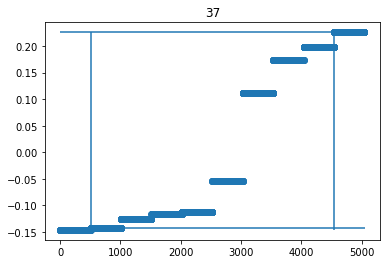

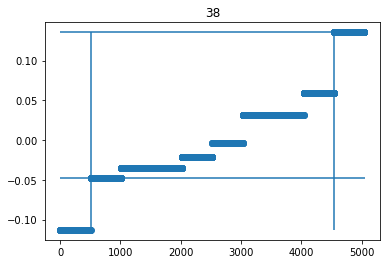

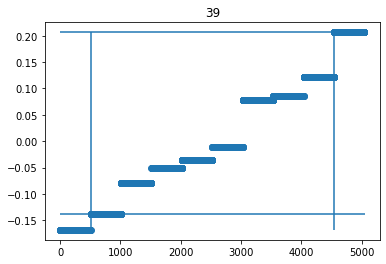

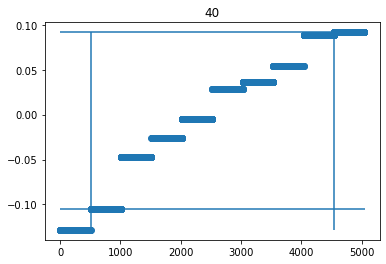

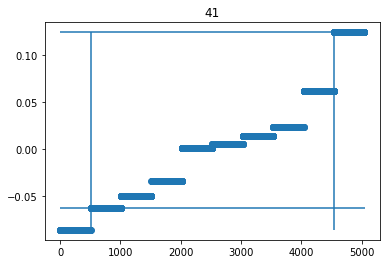

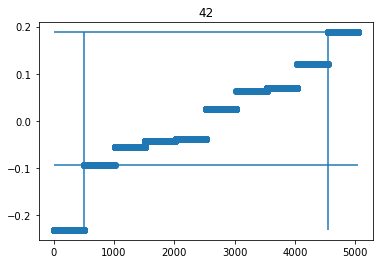

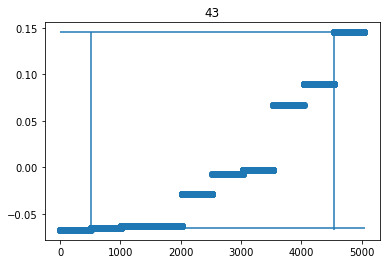

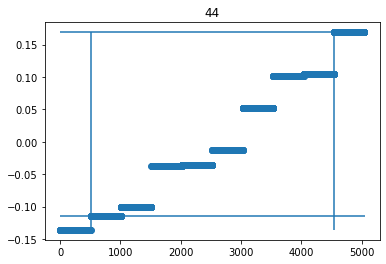

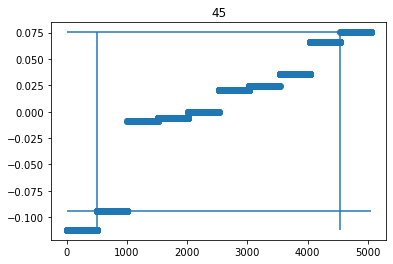

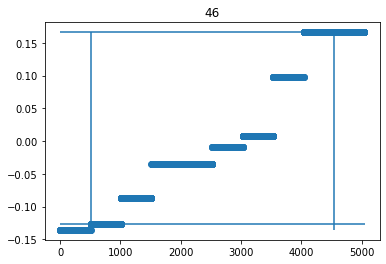

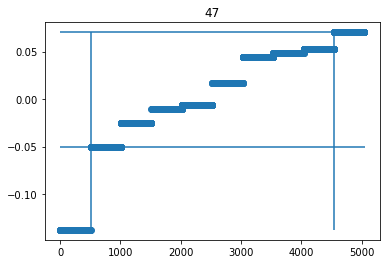

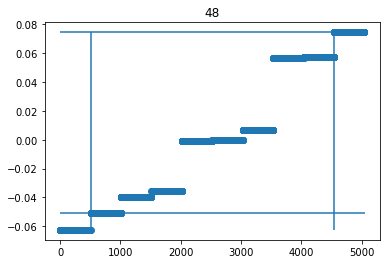

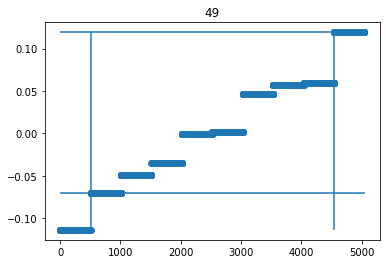

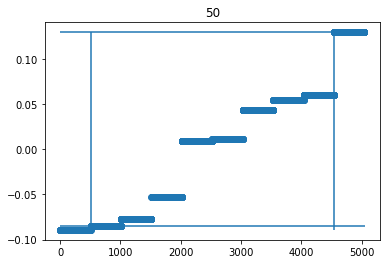

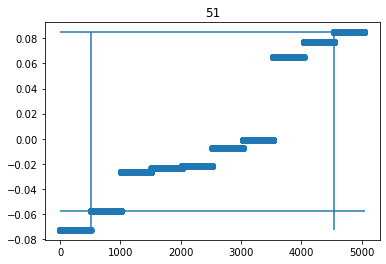

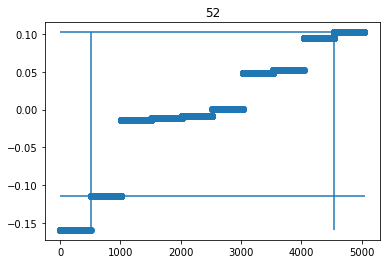

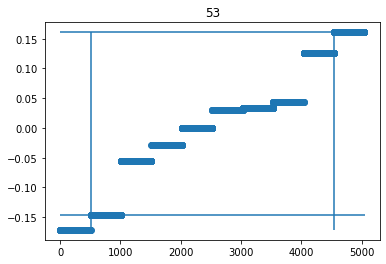

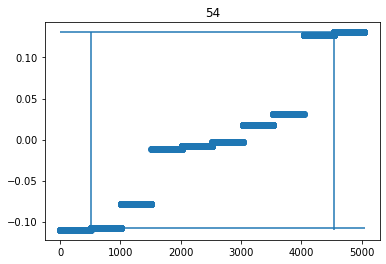

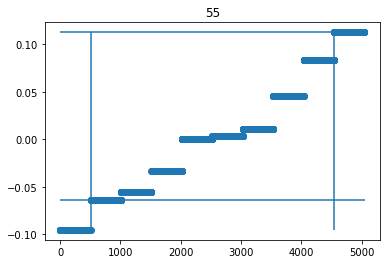

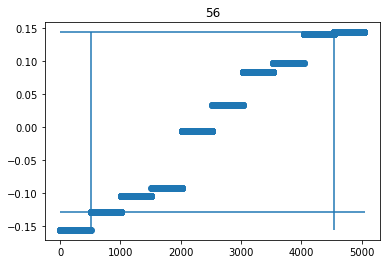

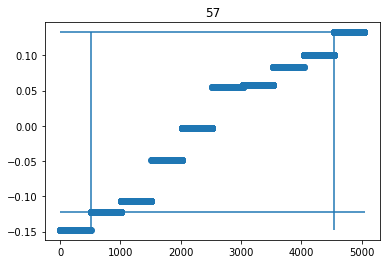

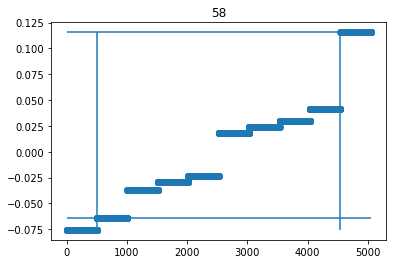

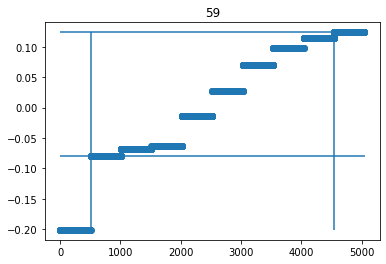

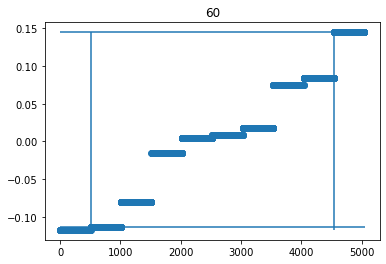

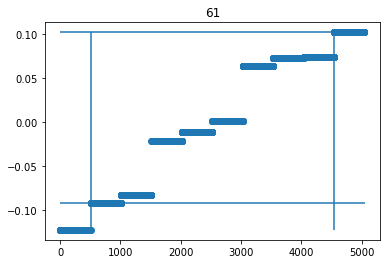

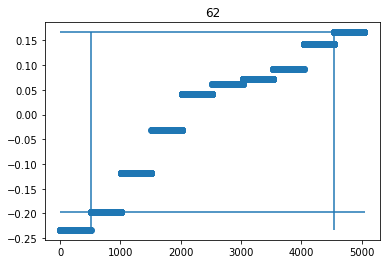

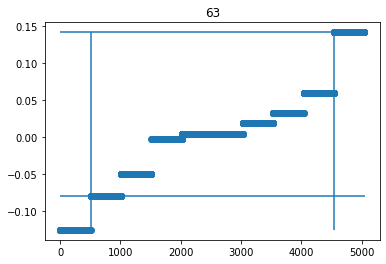

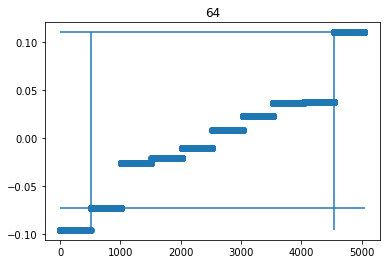

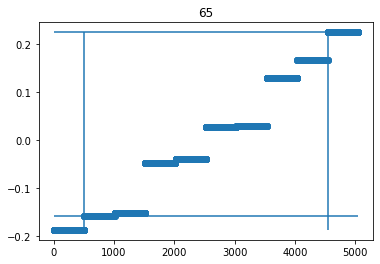

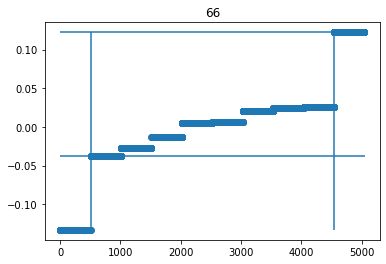

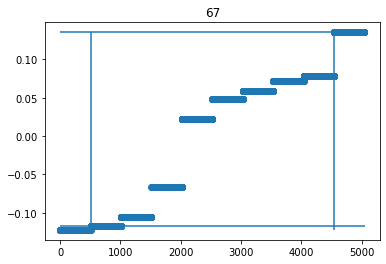

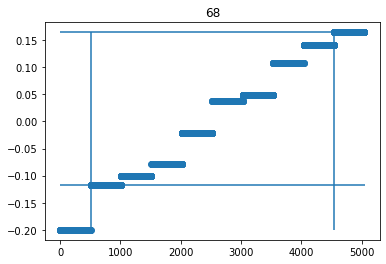

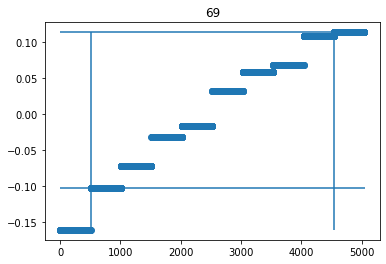

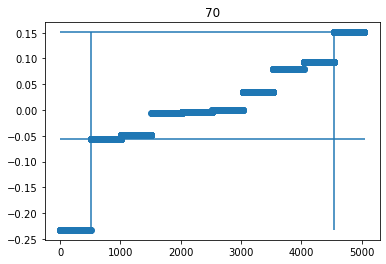

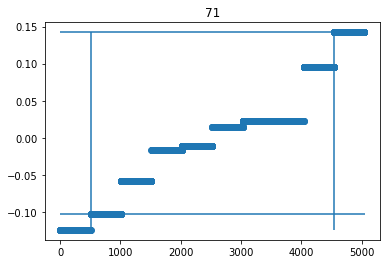

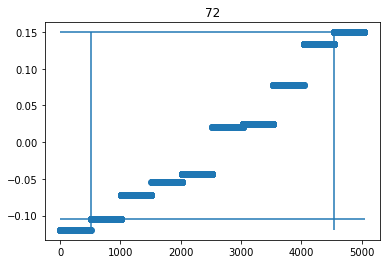

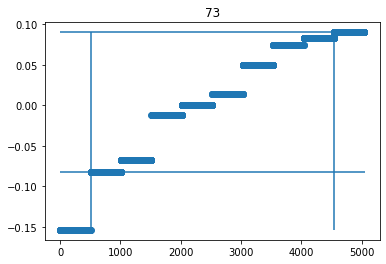

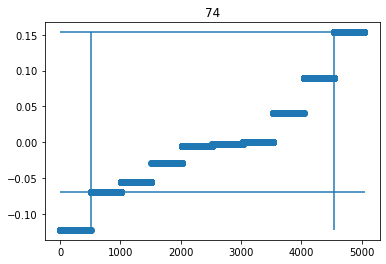

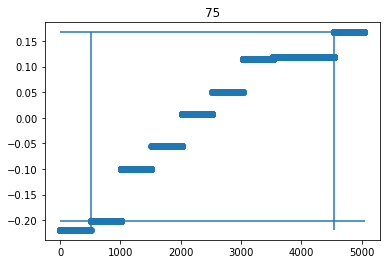

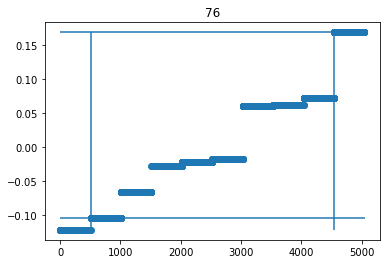

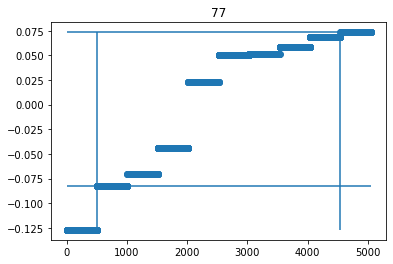

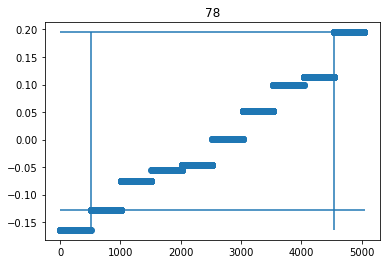

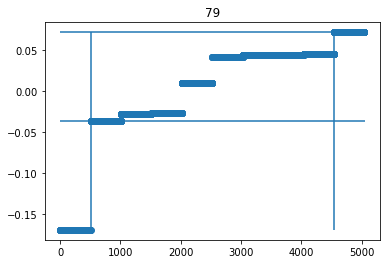

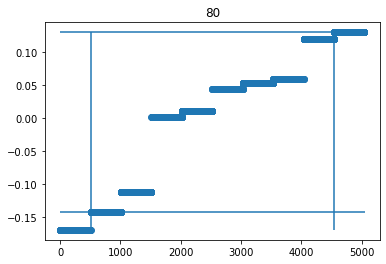

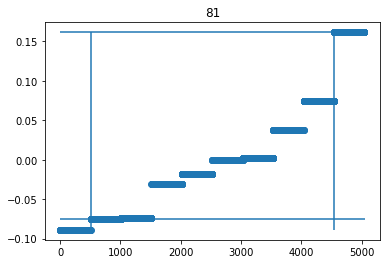

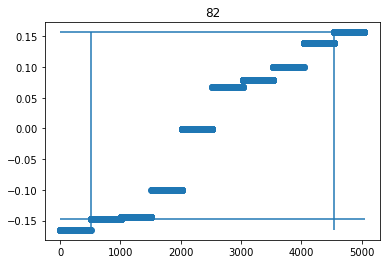

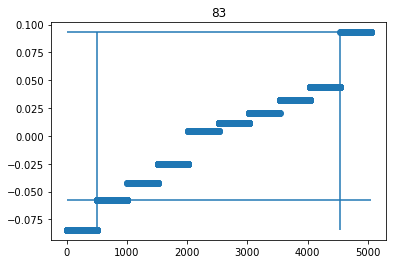

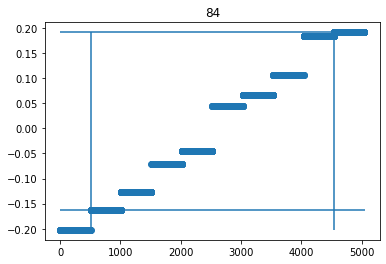

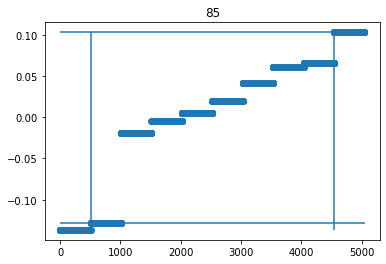

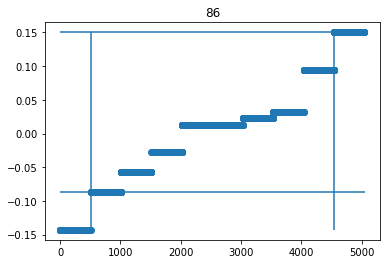

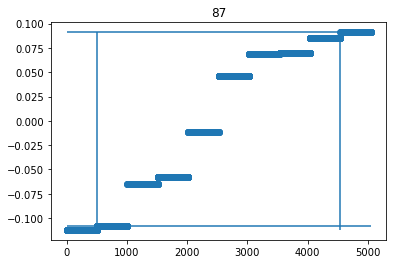

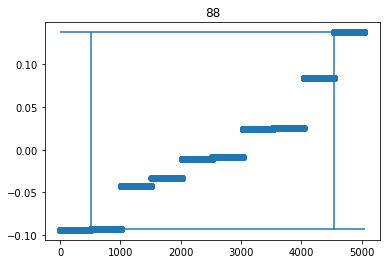

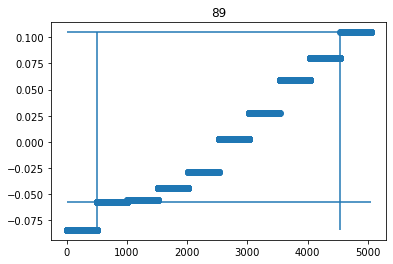

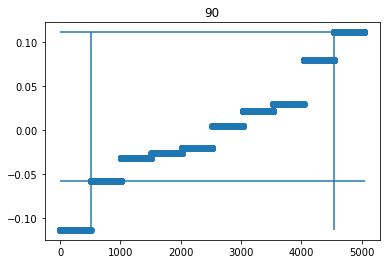

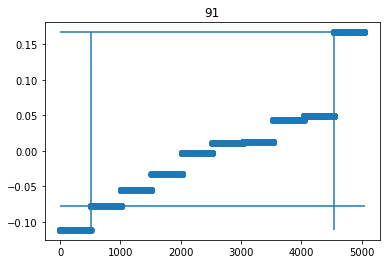

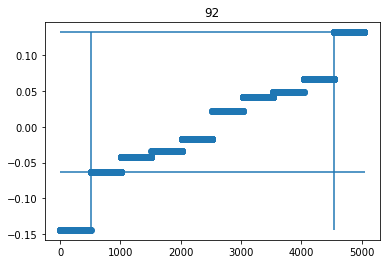

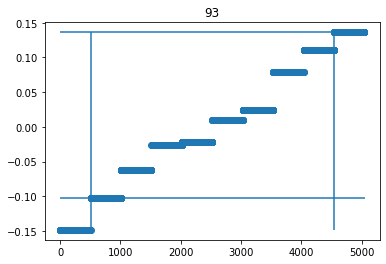

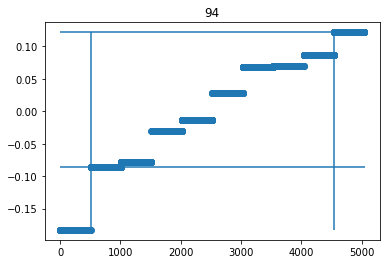

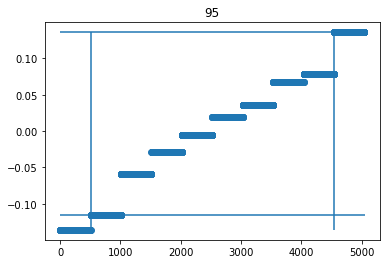

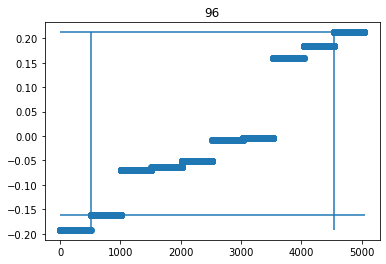

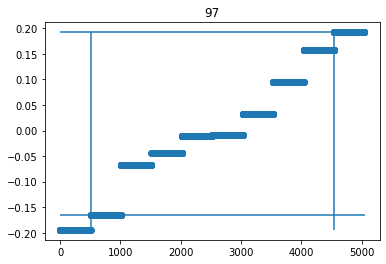

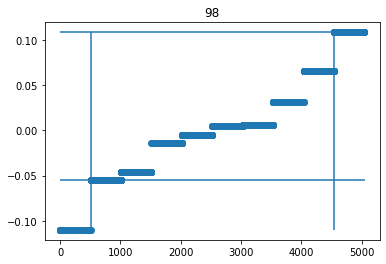

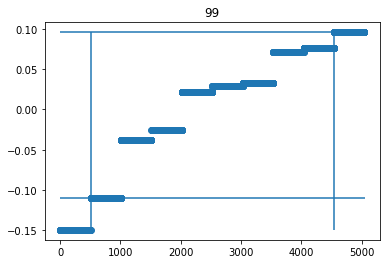

In [69]:
import numpy as np
from math import ceil
import matplotlib.pyplot as plt
##
beta = np.array([])
for i in range(beta_GxE.shape[1]):
# for i in range(5):
    # get single-cell effect sizes
    v = beta_GxE[:,i] 
    # get min and max
    ymin = min(v)
    ymax = max(v)
    # rank values
    order = v.argsort()
    y = v[order]
    x = range(len(v))
    plt.scatter(x,y)
    # define 10% of cells
    xx = ceil(0.1*len(v))
    plt.vlines(x=xx,ymin=ymin, ymax=ymax)
    plt.hlines(y=y[xx],xmin=0, xmax=len(v))
    plt.vlines(x=len(v)-xx,ymin=ymin, ymax=ymax)
    plt.hlines(y=y[len(v)-xx],xmin=0, xmax=len(v))
    # add title
#     plt.title(df.columns.values[i])
    plt.title(str(i))
    plt.show()
    beta = np.append(beta,y[len(v)-xx]-y[xx])

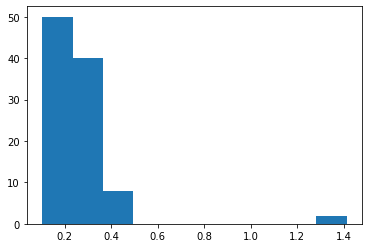

In [76]:
plt.hist(beta)
plt.show()

In [70]:
beta.min()

0.10349096734610227

In [71]:
beta.mean()

0.2628902385893539

In [72]:
beta.max()

1.4125771901984594

In [73]:
beta[10]

1.3229250334694695

In [74]:
beta[11]

1.4125771901984594